In [21]:
import os
import re

def load_curves(folder_name: str):
    local_curves = []
    average_of_local_curves = []
    onchain_curve = []
    for filename in os.listdir(folder_name):
        full_path = os.path.join(folder_name, filename)
        if re.match("local", filename):
            file_content = open(full_path).read()
            search = re.search("\[\d+(,\d+)*\]", file_content)
            if search: 
                data = [int(_e) for _e in search.group()[1:-1].split(",")]
                local_curves.append(data)
                if len(average_of_local_curves) == 0:
                    average_of_local_curves = data.copy()
                else:
                    for i in range(min(len(average_of_local_curves), len(data))):
                        average_of_local_curves[i] += data[i]
                        
            else: 
                print(f"invalid curve file: `{filename}`")
        
        elif re.match("onchain", filename):
            file_content = open(full_path).read()
            search = re.search("\[\d+(,\d+)*\]", file_content)
            if search: 
                onchain_curve = [int(_e) for _e in search.group()[1:-1].split(",")]
            else: 
                print("invalid curve file: ", filename)
            
    for i in range(len(average_of_local_curves)):
        average_of_local_curves[i] /= len(local_curves)
        
    return local_curves, onchain_curve, average_of_local_curves

local_curves, onchain_curve, avg_local_curve = load_curves("./priceCurve_1_5")
# for curve in local_curves:
#     print(f"{len(curve)} {curve}")
# print(f"{len(onchain_curve)} {onchain_curve}")
# print(f"{len(avg_local_curve)} {avg_local_curve}")

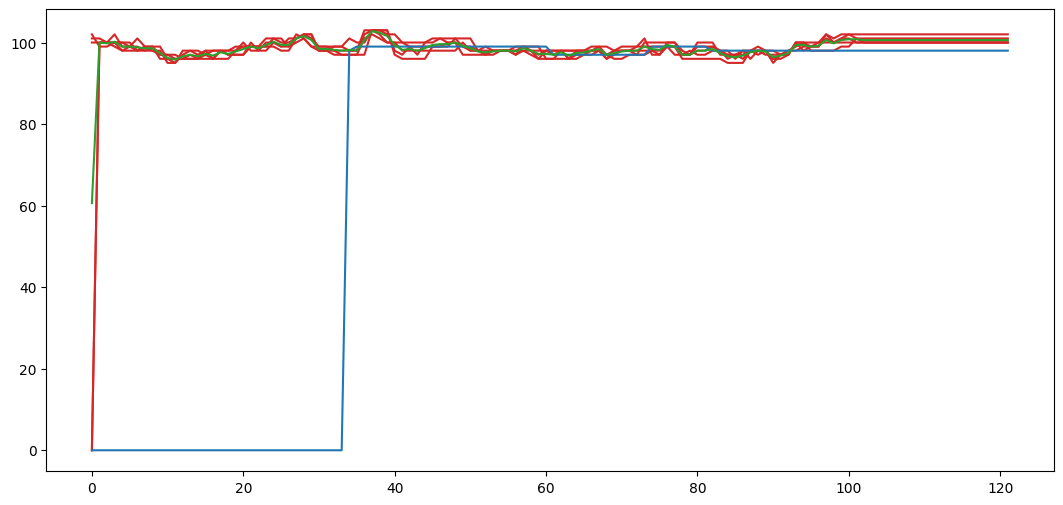

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(13, 6))
for i in range(len(local_curves)):
    ax.plot(local_curves[i], color='tab:red')
ax.plot(onchain_curve, color='tab:blue')
ax.plot(avg_local_curve, color='tab:green')
plt.show()